In [2]:
from tensorflow.keras.layers import Input, Conv2D, \
     BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

input = Input(shape=(224, 224, 3))



In [3]:
!nvidia-smi


Wed Mar 17 10:17:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import cv2
import os
import numpy as np
def get_data(path):
    labels=['nopain','moderate','severe']
    
    data = [] 
    for label in labels: 
        imm_path = os.path.join(path, label)
        print(imm_path)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(imm_path):
            print(img)
            try:
                img_arr = cv2.imread(os.path.join(imm_path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (224, 224)) # Reshaping images to preferred size
                arr=((resized_arr/255)-0.5)/0.5
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
train = get_data('../content/drive/MyDrive/data/train')

Streaming output truncated to the last 5000 lines.
_0_7536.png
_0_449.png
_0_7603.png
_0_7389.png
_0_6215.png
_0_2679.png
_0_6950.png
_0_8854.png
_0_2048.png
_0_9602.png
_0_3325.png
_0_8219.png
_0_8893.png
_0_76.png
_0_2342.png
_0_313.png
_0_5578.png
_0_6798.png
_0_8916.png
_0_561.png
_0_1488.png
_0_7872.png
_0_7423.png
_0_6927.png
_0_4216.png
_0_5978.png
_0_5201.png
_0_539.png
_0_8702.png
_0_8908.png
_0_1779.png
_0_4440.png
_0_3424.png
_0_4718.png
_0_2602.png
_0_2308.png
_0_288.png
_0_9306.png
_0_132.png
_0_2218.png
_0_8524.png
_0_8653.png
_0_2376.png
_0_9128.png
_0_4704.png
_0_9535.png
_0_5329.png
_0_4480.png
_0_3209.png
_0_3965.png
_0_107.png
_0_8824.png
_0_2688.png
_0_2862.png
_0_7182.png
_0_8803.png
_0_922.png
_0_2495.png
_0_6427.png
_0_8972.png
_0_5591.png
_0_6348.png
_0_1530.png
_0_1980.png
_0_7148.png
_0_6356.png
_0_9046.png
_0_7477.png
_0_1785.png
_0_2450.png
_0_8621.png
_0_5937.png
_0_5247.png
_0_6365.png
_0_7393.png
_0_8146.png
_0_6656.png
_0_30.png
_0_9702.png
_0_6308.png
_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [7]:
val = get_data('../content/drive/MyDrive/data/val')


../content/drive/MyDrive/data/val/nopain
0
aa048t2aeunaff015.png
dr052t2aaaff224.png
nm106t1aaaff143.png
vw121t1aeaff056.png
ak064t1aiunaff143.png
ll042t1aaaff041.png
aa048t2aeunaff004.png
nm106t1aaaff144.png
bg096t1aaaff005.png
bg096t1aaaff017.png
bn080t1aeaff095.png
jk103t1afunaff154.png
ll042t1aaaff042.png
aa048t2aeunaff003.png
bg096t1aaaff004.png
bn080t1aeaff094.png
aa048t2aaunaff007.png
aa048t2aaunaff019.png
th108t2afaff220.png
mg066t2aeunaff049.png
bn080t1aeaff082.png
dr052t2aaaff223.png
mg066t2aeunaff035.png
th108t2afaff219.png
jk103t1afunaff143.png
mg066t2aeunaff034.png
bg096t1aaaff016.png
aa048t2aeaff121.png
bn080t1aeaff083.png
ak064t1aiunaff131.png
ak064t1aiunaff142.png
mg066t2aeunaff050.png
jk103t1afunaff155.png
jk103t1afunaff142.png
aa048t2aeaff120.png
aa048t2aaunaff008.png
vw121t1aeaff055.png
aa048t2aaunaff020.png
_0_6743.png
_0_7060.png
_0_590.png
_0_4566.png
_0_528.png
_0_8319.png
_0_1222.png
_0_1849.png
_0_5192.png
_0_9032.png
_0_8402.png
_0_8835.png
_0_782.png
_0_4906.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [8]:
test = get_data('../content/drive/MyDrive/data/test')

../content/drive/MyDrive/data/test/nopain
0
ak064t1aiunaff156.png
mg066t2aeunaff037.png
bg096t1aaaff025.png
mg066t2aeunaff063.png
jk103t1aiaff175.png
ak064t1aiunaff157.png
tv095t2afaff272.png
ll042t1aaaff045.png
mg066t2aeunaff038.png
jk103t1aiaff176.png
tv095t2afaff280.png
tv095t2afaff277.png
tv095t2afaff273.png
mg066t2aeunaff061.png
jk103t1aiaff177.png
ll042t1aaaff046.png
aa048t2aeaff148.png
dr052t2aeaff018.png
tv095t2afaff275.png
bn080t1aeaff098.png
aa048t2aeunaff018.png
bg096t1aaaff027.png
tv095t2afaff276.png
tv095t2afaff278.png
aa048t2aeaff146.png
dr052t2aeaff019.png
aa048t2aeaff147.png
tv095t2afaff281.png
bn080t1aeaff099.png
bn080t1aeaff100.png
mg066t2aeunaff062.png
tv095t2afaff271.png
ll042t1aaaff047.png
tv095t2afaff279.png
tv095t2afaff274.png
nm106t1aaaff158.png
aa048t2aeunaff019.png
bg096t1aaaff026.png
nm106t1aaaff159.png
dr052t2aeaff020.png
aa048t2aeunaff020.png
ak064t1aiunaff158.png
../content/drive/MyDrive/data/test/moderate
1
th108t2afaff131.png
th108t2afaff104.png
th108t2a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [9]:
import numpy as np 
x_train=[]
y_train=[]
x_val=[]
y_val=[]
for feature , label in train :
  x_train.append(feature)
  y_train.append(label)
for feature , label in val : 
  x_val.append(feature)
  y_val.append(label)

x_train =np.array(x_train)
x_train.reshape(-1, 224, 224, 1)
y_train = np.array(y_train)
x_val =np.array(x_val)
x_val.reshape(-1, 224, 224, 1)
y_val = np.array(y_val)

In [10]:
x = Conv2D(filters=96,
           kernel_size=11,
           strides=4,
           padding='same',
           activation='relu')(input)  # 1st convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

In [11]:
x = Conv2D(filters=256,
           kernel_size=5,
           padding='same',
           activation='relu')(x)  # 2nd convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

In [12]:

x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 3rd convolutional layer

x = Conv2D(filters=384,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 4th convolutional layer


In [13]:
x = Conv2D(filters=256,
           kernel_size=3,
           padding='same',
           activation='relu')(x)  # 5th convolutional layer
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

In [14]:
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)
x = Dropout(rate=0.5)(x)

In [15]:
output = Dense(units=3, activation='softmax')(x)

In [16]:
from tensorflow.keras import Model

model = Model(inputs=input, outputs=output)

In [26]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [27]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val),batch_size=32)

Epoch 1/100
302/302 [==============================] - 34s 110ms/step - loss: 0.0598 - accuracy: 0.9773 - val_loss: 0.6983 - val_accuracy: 0.8455
Epoch 2/100
302/302 [==============================] - 33s 109ms/step - loss: 0.0358 - accuracy: 0.9852 - val_loss: 0.7381 - val_accuracy: 0.8512
Epoch 3/100
302/302 [==============================] - 33s 110ms/step - loss: 0.0301 - accuracy: 0.9885 - val_loss: 0.7862 - val_accuracy: 0.8479
Epoch 4/100
302/302 [==============================] - 33s 109ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.8759 - val_accuracy: 0.8532
Epoch 5/100
302/302 [==============================] - 33s 109ms/step - loss: 0.0244 - accuracy: 0.9912 - val_loss: 0.8780 - val_accuracy: 0.8584
Epoch 6/100
302/302 [==============================] - 33s 109ms/step - loss: 0.0234 - accuracy: 0.9901 - val_loss: 0.9955 - val_accuracy: 0.8623
Epoch 7/100
302/302 [==============================] - 33s 109ms/step - loss: 0.0194 - accuracy: 0.9932 - val_loss: 1.0830 -

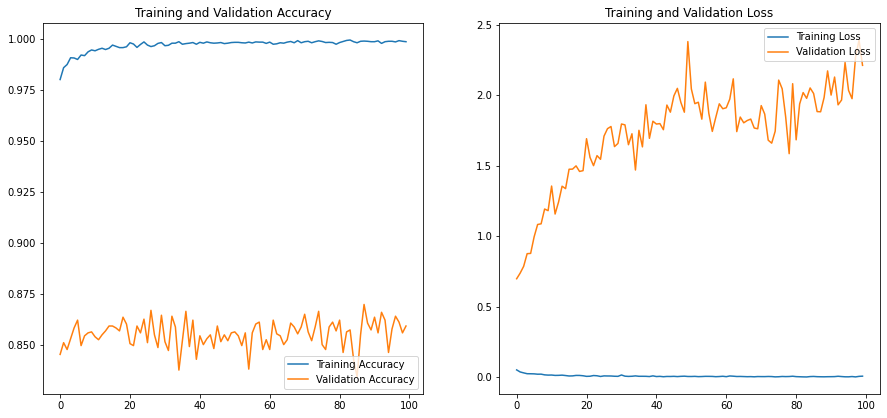

In [28]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
x_test=[]
y_test=[]
for x,y in test:
    x_test.append(x)
    y_test.append(y)
for i in range((len(x_test))):
    x_test[i]=(x_test[i])/255
x_test=np.array(x_test)
x_test.reshape(-1, 224, 224, 1)
y_test = np.array(y_test)
print(model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 41ms/step - loss: 9.4806 - accuracy: 0.3853
[9.48063850402832, 0.38532111048698425]
